## 모델(Model)

* 딥러닝 모델은 레이어로 만들어진 비순환 유향 그래프(Directed Acyclic Graph, DAG) 구조

### 모델 구성

  - `Sequential()`
  - 서브클래싱(Subclassing)
  - 함수형 API

#### Sequential()

- 모델이 순차적인 구조로 진행할 때 사용
- 간단한 방법
  - Sequential 객체 생성 후,`add()`를 이용한 방법
  - Sequential 인자에 한번에 추가 방법
- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음


In [1]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

In [2]:
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 28, 300)        │         8,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28, 100)        │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28, 10)         │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,810 (155.51 KB)

 Trainable params: 39,810 (155.51 KB)

 Non-trainable params: 0 (0.00 B)

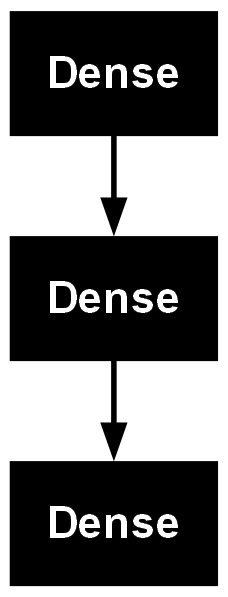

In [3]:
plot_model(model)

In [4]:
model = Sequential([Input(shape=(28, 28), name='Input'),
                    Dense(300, activation='relu', name='Dense1'),
                    Dense(100, activation='relu', name='Dense2'),
                    Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense1 (Dense)                  │ (None, 28, 300)        │         8,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 28, 100)        │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 28, 10)         │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,810 (155.51 KB)

 Trainable params: 39,810 (155.51 KB)

 Non-trainable params: 0 (0.00 B)

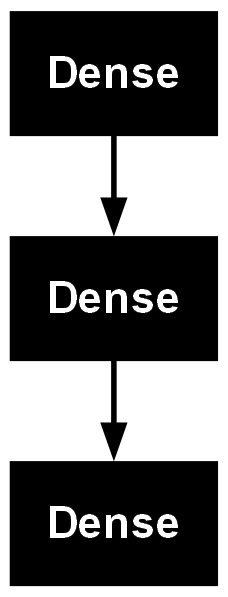

In [5]:
plot_model(model)

#### 함수형 API

- 가장 권장되는 방법
- 모델을 복잡하고, 유연하게 구성 가능
- 다중 입출력을 다룰 수 있음

In [8]:
inputs = Input(shape=(28, 28, 1))
x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

c:\Users\82106\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

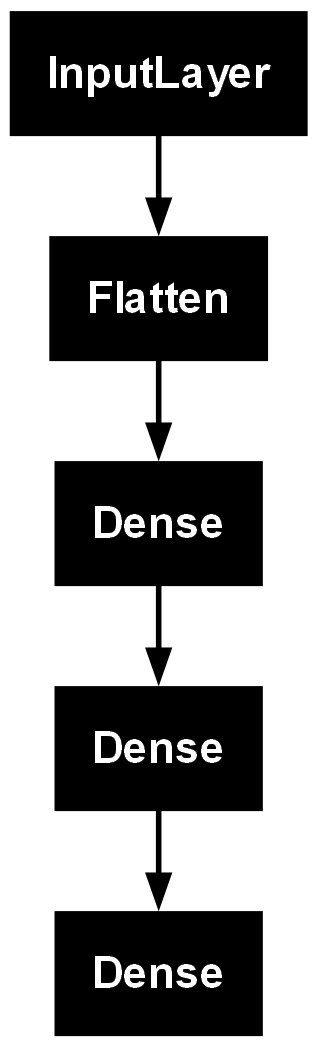

In [9]:
plot_model(model)

In [14]:
from tensorflow.keras.layers import Concatenate

input_layer = Input(shape=(28, 28))
hidden1 = Dense(100, activation='relu')(input_layer)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_layer], outputs=[output])
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 28, 100)   │      2,900 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 28, 30)    │      3,030 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 28, 58)    │          0 │ input_layer_6[0]… │
│ (Concatenate)       │                   │            │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 28, 1)     │         59 │ concatenate_3[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,989 (23.39 KB)

 Trainable params: 5,989 (23.39 KB)

 Non-trainable params: 0 (0.00 B)

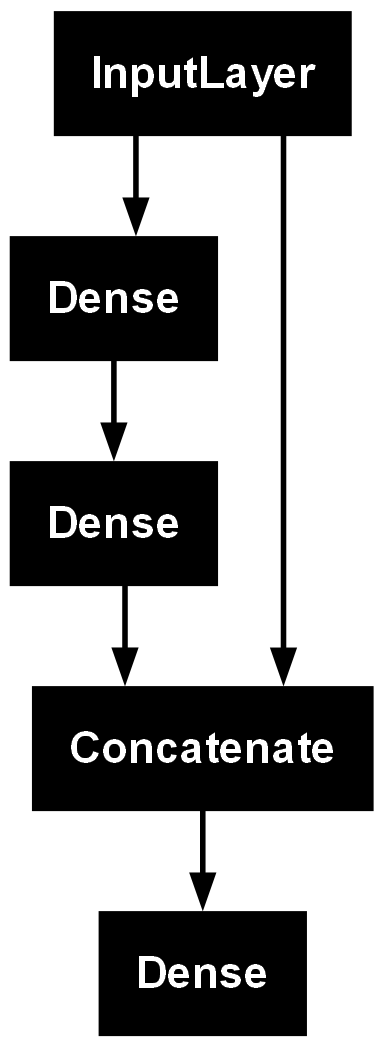

In [15]:
plot_model(model)

In [16]:
input_1 = Input(shape=(10, 10), name='Input_1')
input_2 = Input(shape=(10, 28), name='Input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='output')(concat)

model = Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input_2             │ (None, 10, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 10, 100)   │      2,900 │ Input_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Input_1             │ (None, 10, 10)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 10, 10)    │      1,010 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 10, 20)    │          0 │ Input_1[0][0],    │
│ (Concatenate)       │                   │            │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 10, 1)     │         21 │ concatenate_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,931 (15.36 KB)

 Trainable params: 3,931 (15.36 KB)

 Non-trainable params: 0 (0.00 B)

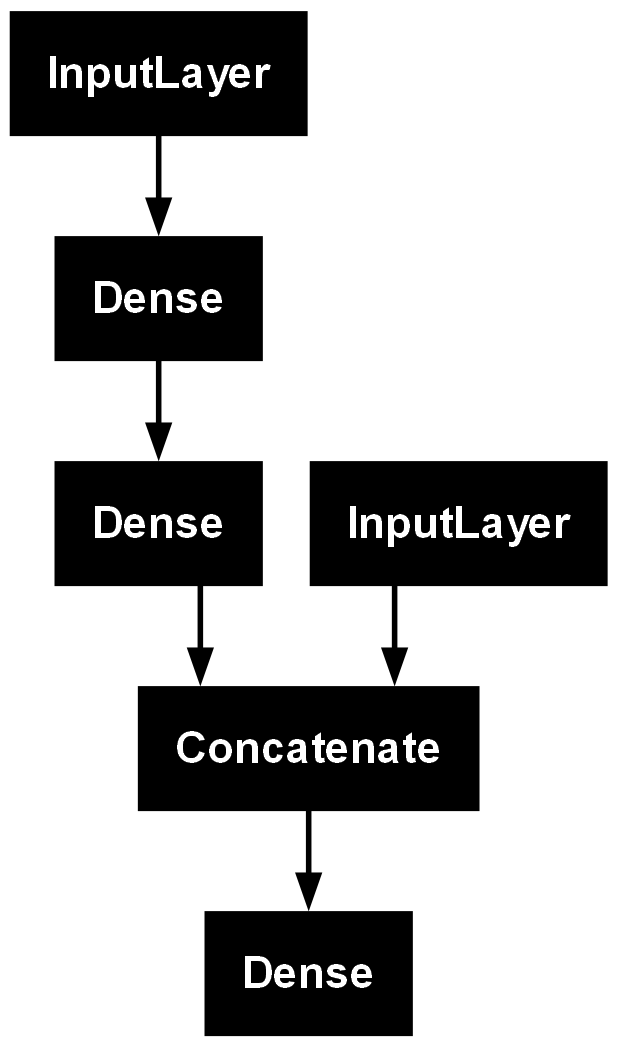

In [17]:
plot_model(model)

In [18]:
input_ = Input(shape=(10, 10), name='input_')
hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ (InputLayer) │ (None, 10, 10)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 10, 100)   │      1,100 │ input_[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 10, 10)    │      1,010 │ dense_23[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 10, 1)     │         11 │ dense_24[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sum_output (Dense)  │ (None, 10, 1)     │         11 │ dense_24[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,132 (8.33 KB)

 Trainable params: 2,132 (8.33 KB)

 Non-trainable params: 0 (0.00 B)

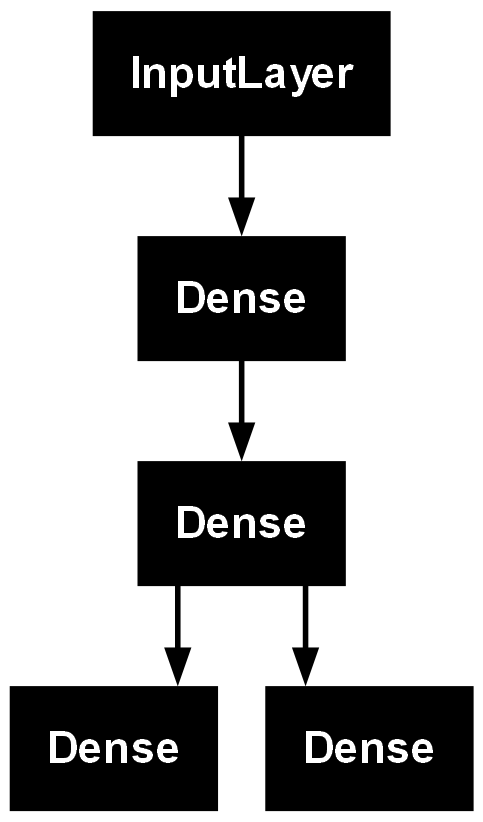

In [19]:
plot_model(model)

In [20]:
input_1 = Input(shape=(10, 10), name='input_1')
input_2 = Input(shape=(10, 28), name='input_2')
hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_2             │ (None, 10, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 10, 100)   │      2,900 │ input_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_1             │ (None, 10, 10)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 10, 10)    │      1,010 │ dense_25[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 10, 20)    │          0 │ input_1[0][0],    │
│ (Concatenate)       │                   │            │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 10, 1)     │         21 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sum_output (Dense)  │ (None, 10, 1)     │         11 │ dense_26[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,942 (15.40 KB)

 Trainable params: 3,942 (15.40 KB)

 Non-trainable params: 0 (0.00 B)

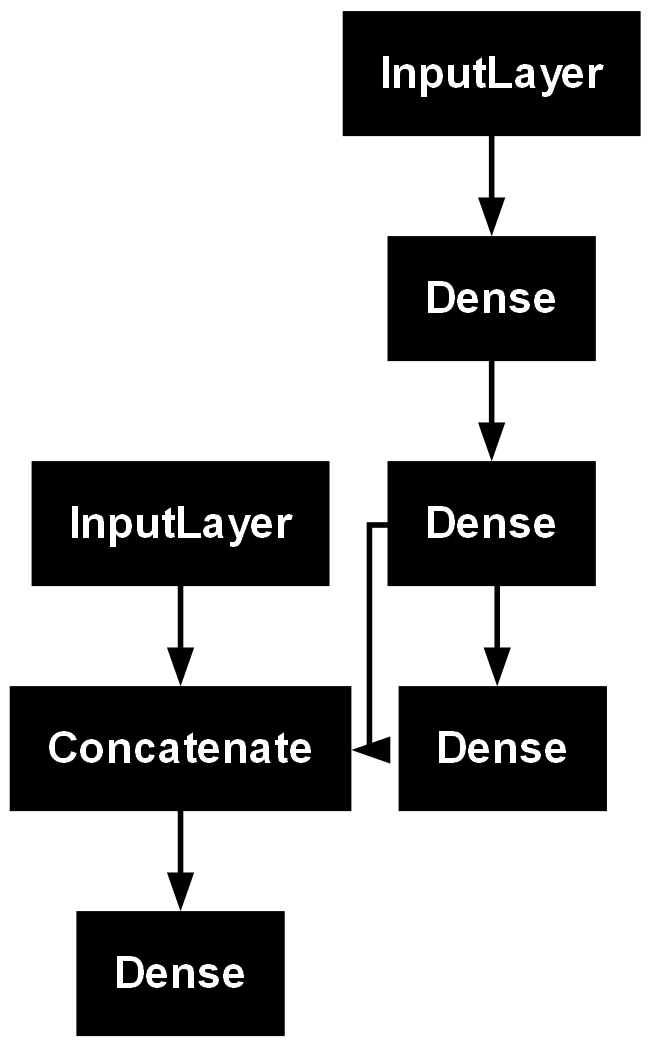

In [21]:
plot_model(model)

#### 서브클래싱(Subclassing)

- 커스터마이징에 최적화된 방법
- Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음  
  - `fit()`, `evaluate()`, `predict()`
  - `save()`, `load()`
- 주로 `call()` 메소드안에서 원하는 계산 가능
  - for, if, 저수준 연산 등
- 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때, 해석할 수 있어야함

In [22]:
class MyModel(Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = Dense(300, activation=activation)
    self.dense_layer2 = Dense(100, activation=activation)
    self.dense_layer3 = Dense(units, activation=activation)
    self.output_layer = Dense(10 ,activation='softmax')
    
  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x

### 모델 가중치 확인

In [23]:
inputs = Input(shape=(28, 28, 1))
x = Flatten(input_shape=(28, 28, 1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

c:\Users\82106\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.layers

[<InputLayer name=input_layer_7, built=True>,
 <Flatten name=flatten_2, built=True>,
 <Dense name=dense_27, built=True>,
 <Dense name=dense_28, built=True>,
 <Dense name=dense_29, built=True>]

In [25]:
hidden_2 = model.layers[2]
hidden_2.name

'dense_27'

In [26]:
model.get_layer('dense_27') is hidden_2

True

In [27]:
weights, biases = hidden_2.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [28]:
print(weights)

[[ 0.00528054 -0.0089843   0.06292021 ... -0.01373895 -0.00052924
   0.05000929]
 [-0.03506063  0.02246508 -0.05824041 ...  0.0497898   0.03099064
   0.05652577]
 [-0.03131944  0.04992974  0.04333702 ... -0.0029489  -0.06616675
   0.01463334]
 ...
 [ 0.0270526  -0.02646198  0.00087418 ...  0.03511251 -0.02016223
   0.02954034]
 [-0.01667067  0.06577785 -0.061731   ... -0.05893097  0.03960463
  -0.06088818]
 [ 0.01963054 -0.05586381 -0.01298657 ... -0.05981534 -0.03150438
   0.05452269]]


In [29]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 모델 컴파일(compile)

- 모델을 구성한 후, 사용할 손실 함수(loss function), 옵티마이저(optimizer)를 지정


In [30]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#### 손실 함수(Loss Function)

* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* Keras에서 주요 손실 함수 제공
  - `sparse_categorical_crossentropy`: 클래스가 배타적 방식으로 구분, 즉 (0, 1, 2, ..., 9)와 같은 방식으로 구분되어 있을 때 사용
  - `categorical_cross_entropy`: 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용
  - `binary_crossentropy`: 이진 분류를 수행할 때 사용

##### 평균절대오차(Mean Absolute Error, MAE)

* 오차가 커져도 손실함수가 일정하게 증가
* 이상치(Outlier)에 강건함(Robust)
  -  데이터에서 [입력 - 정답] 관계가 적절하지 않은 것이 있을 경우에, 좋은 추정을 하더라도 오차가 발생하는 경우가 발생
  - 해당 이상치에 해당하는 지점에서 손실 함수의 최소값으로 가는 정도의 영향력이 크지 않음
* 회귀 (Regression)에 많이 사용
* 평균절대오차 식:
$ \qquad \qquad E = \frac{1}{n}\sum_{i=1}^n \left | y_i - \tilde{y}_i \right |$
  - $y_i$ : 학습 데이터의 $i\ $번째 정답
  - $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력

![](https://miro.medium.com/max/1152/1*8BQhdKu1nk-tAAbOR17qGg.png)
<br />

##### 평균제곱오차(Mean Squared Error, MSE)

* 가장 많이 쓰이는 손실 함수 중 하나
* 오차가 커질수록 손실함수가 빠르게 증가
  - 정답과 예측한 값의 차이가 클수록 더 많은 페널티를 부여
* 회귀 (Regression)에 쓰임
* 평균제곱오차 식: $ \qquad \qquad E = \frac{1}{n}\sum_{i=1}^n ( y_i - \tilde{y}_i)^2 $
  - $y_i$ : 학습 데이터의 $i\ $번째 정답
  - $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력

![](https://miro.medium.com/max/1152/1*EqTaoCB1NmJnsRYEezSACA.png)
<br />


##### 손실함수 MAE와 MSE 비교

![](https://miro.medium.com/max/1400/1*JTC4ReFwSeAt3kvTLq1YoA.png)
<br />

##### 원-핫 인코딩(One-Hot Encoding)

- 범주형 변수를 표현할 때 사용
- 가변수(Dummy Variable)이라고도 함
- 정답인 레이블을 제외하고 0으로 처리

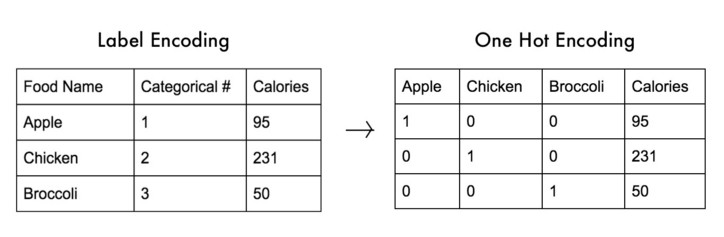

##### 교차 엔트로피 오차(Cross Entropy Error, CEE)

* 이진 분류(Binary Classification), 다중 클래스 분류(Multi Class Classification)
* 소프트맥스(softmax)와 원-핫 인코딩(ont-hot encoding) 사이의 출력 간 거리를 비교
* 정답인 클래스에 대해서만 오차를 계산
* 정답을 맞추면 오차가 0, 틀리면 그 차이가 클수록 오차가 무한히 커짐
* $y = log(x)$
  - $x$가 1에 가까울수록 0에 가까워짐
  - $x$가 0에 가까울수록 $y$값은 무한히 커짐


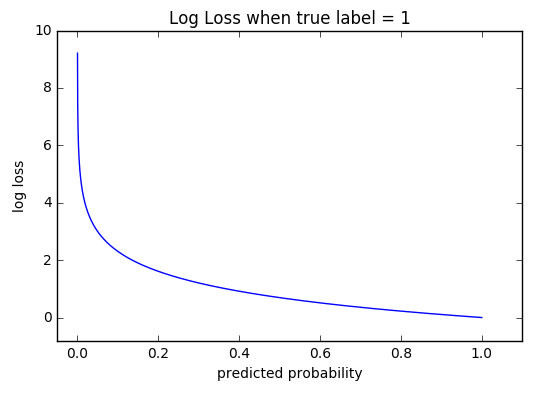

* 교차 엔트로피 오차 식: $ \qquad \qquad E = - \frac{1}{N}\sum_{n} \sum_{i}  y_i\ log\tilde{y}_i  $
  - $y_i$ : 학습 데이터의 $i\ $번째 정답 (원-핫 인코딩, one-hot encoding)
  - $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력
  - $N$ : 전체 데이터의 개수
  - $i$ : 데이터 하나당 클래스 개수

* 정답 레이블($y_i$)은 원-핫 인코딩으로 정답인 인덱스에만 1이고, 나머지는 모두 0이라서 다음과 같이 나타낼 수 있음

 $ \qquad \qquad E = - log\tilde{y}_i  $

  - 소프트맥스를 통해 나온 신경망 출력이 0.6이라면 $\ -log0.6 \fallingdotseq -0.51\ $이 되고, 신경망 출력이 0.3이라면  $\ -log0.3 \fallingdotseq -1.2\ $이 됨
  - 정답에 가까워질수록 오차값은 작아짐
  - 학습시, 원-핫 인코딩에 의해 정답 인덱스만 살아 남아 비교하지만, 정답이 아닌 인덱스들도 학습에 영향을 미침. 왜냐하면 다중 클래스 분류는 소프트맥스(softmax) 함수를 통해 전체 항들을 모두 다루기 때문

##### 이진 분류 문제의 교차 크로스 엔트로피(Binary Cross Entropy, BCE)

* 이진 분류 문제(Binary Classification Problem)에서도 크로스 엔트로피 오차를 손실함수로 사용 가능
$ \qquad \qquad E = - \sum_{i=1}^2  y_i\ log\tilde{y}_i \\
\qquad \qquad \ \ \ = -y_1\ log\ \tilde{y}_1 - (1 - y_1)log(1-\ \tilde{y}_1) $  
$\qquad \qquad \qquad ( \because y_2 = 1 - y_1)$
  - $y_i$ : 학습 데이터의 $i\ $번째 정답 (원-핫 인코딩, one-hot encoding)
  - $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력

* 2개의 클래스를 분류하는 문제에서 1번이 정답일 확률이 0.8이고, 실제로 정답이 맞다면 다음과 같이 나타낼 수 있음

### $ \qquad \qquad E = -y_1\ log\ \tilde{y}_1 - (1 - y_1)\ log\ (1-\ \tilde{y}_1) \\
\qquad \qquad \ \ \ = -1\ log\ 0.8 - (1 - 1)\ log\ (1 - 0.8)\\
\qquad \qquad \ \ \ = -log\ 0.8 \\
\qquad \qquad \ \ \ \fallingdotseq -0.22
$

* 반대로, 실제로 정답이 2번이었다면, 식은 다음과 같이 나타낼 수 있음

### $ \qquad \qquad E = -y_1\ log\ \tilde{y}_1 - (1 - y_1)\ log\ (1-\ \tilde{y}_1) \\
\qquad \qquad \ \ \ = -0\ log\ 0.8 - (1 - 0)\ log\ (1 - 0.8)\\
\qquad \qquad \ \ \ = -log\ 0.2 \\
\qquad \qquad \ \ \ \fallingdotseq -1.61
$  



#### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* Keras에서 여러 옵티마이저 제공
  - `keras.optimizer.SGD()`: 기본적인 확률적 경사 하강법
  - `keras.optimizer.Adam()`: 자주 사용되는 옵티마이저
  - Keras에서 사용되는 옵티마이저 종류: https://keras.io/ko/optimizers/
* 보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일    


##### 볼록함수(Convex Function)와 비볼록함수(Non-Convex Function)

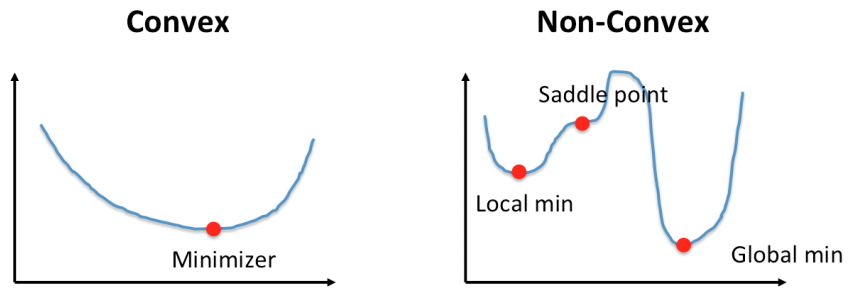

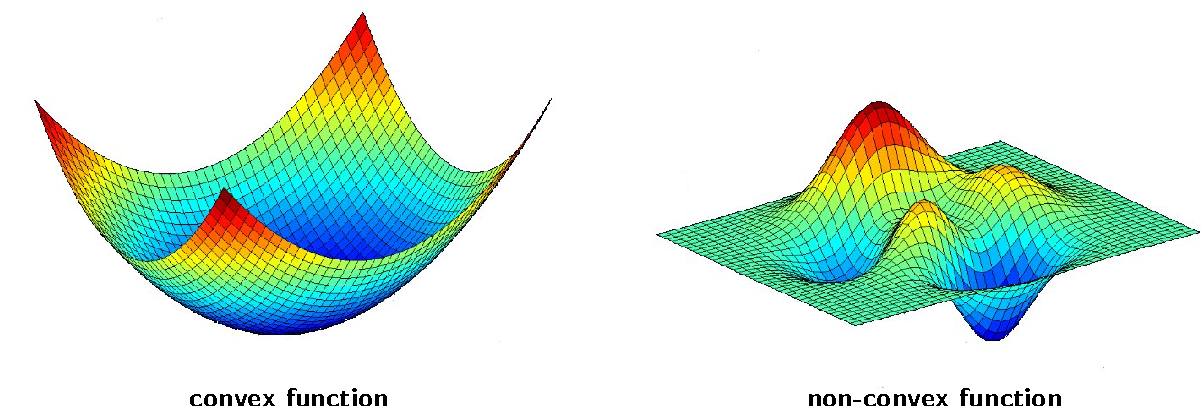

* 볼록함수(Convex Function)
  - 어떤 지점에서 시작하더라도 최적값(손실함수가 최소로하는 점)에 도달할 수 있음
* 비볼록함수(Non-Convex Function)
  - 비볼록 함수는 시작점 위치에 따라 다른 최적값에 도달할 수 있음

##### 경사하강법(Gradient Decent)

* 미분과 기울기
  - 스칼라를 벡터로 미분한 것

## $\quad \frac{df(x)}{dx} = \lim_{\triangle x \to 0} \frac{f(x+\triangle x) - f(x)}{\triangle x}$

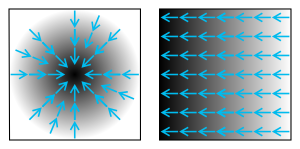

 $\quad \triangledown f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2},\ ... \ , \frac{\partial f}{\partial x_N} \right)$
  - 변화가 있는 지점에서는 미분값이 존재하고, 변화가 없는 지점은 미분값이 0
  - 미분값이 클수록 변화량이 크다는 의미


* 경사하강법의 과정
- 경사하강법은 한 스텝마다의 미분값에 따라 이동하는 방향을 결정
- $f(x)$의 값이 변하지 않을 때까지 반복
  
  $\qquad x_n = x_{n-1} - \eta \frac{\partial f}{\partial x}$
    - $\eta$ : 학습률(learning rate)
- 즉, **미분값이 0인 지점**을 찾는 방법  

<img src="https://thumbs.gfycat.com/AngryInconsequentialDiplodocus-size_restricted.gif">

##### 학습률(learning rate)

- 적절한 학습률을 지정해야 최저점에 잘 도달할 수 있음
- 학습률이 너무 크면 발산하고, 너무 작으면 학습이 오래 걸리거나 최저점에 도달하지 않음

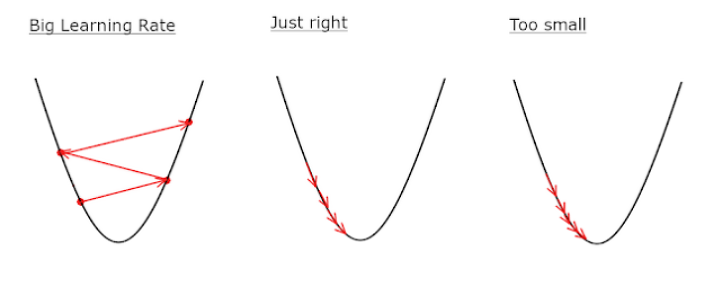

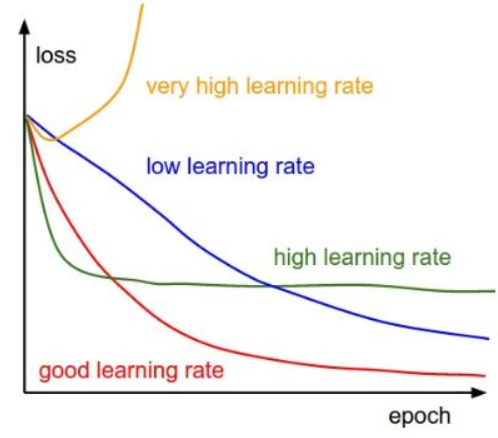

##### 안장점(Saddle Point)

- 기울기가 0이지만 극값이 되지 않음
- 경사하강법은 안장점에서 벗어나지 못함

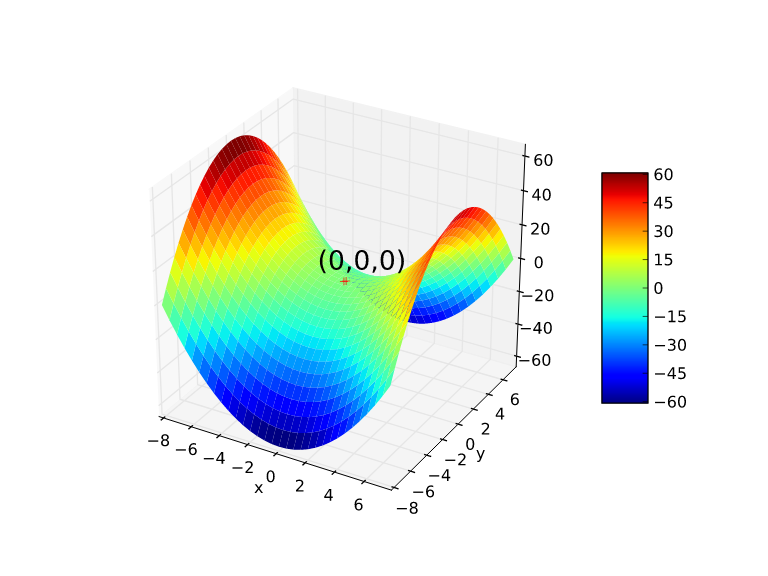

#### 지표(Metrics)

- 모니터링할 지표
- `mae`나 `accuracy` 사용
- 줄여서 `acc`로도 사용 가능
- Keras에서 사용되는 지표 종류: https://keras.io/ko/metrics/

### 모델 학습, 평가 및 예측

- `fit()`
  - `x`: 학습 데이터
  - `y`: 학습 데이터 정답 레이블
  - `epochs`: 학습 회수
  - `batch_size`: 단일 배치에 있는 학습 데이터의 크기
  - `validation_data`: 검증을 위한 데이터
- `evaluate()`
  - 테스트 데이터를 이용한 평가
- `predict()`
  - 임의의 데이터를 사용해 예측

#### 오차역전파 (Backpropagation)

* 오차역전파 알고리즘
  - 학습 데이터로 정방향(forward) 연산을 통해 손실함수 값(loss)을 구함
  - 각 layer별로 역전파학습을 위해 중간값을 저장
  - 손실함수를 학습 파라미터(가중치, 편향)로 미분하여 마지막 layer로부터 앞으로 하나씩 연쇄법칙을 이용하여 미분
  - 각 layer를 통과할 때마다 저장된 값을 이용
  - 오류(error)를 전달하면서 학습 파라미터를 조금씩 갱신

* 오차역전파 학습의 특징
  - 손실함수를 통한 평가를 한 번만 하고, 연쇄법칙을 이용한 미분을 활용하기 때문에 학습 소요시간이 매우 단축
  - 미분을 위한 중간값을 모두 저장하기 때문에 메모리를 많이 사용

* 신경망 학습에 있어서 미분가능의 중요성
  - 경사하강법(Gradient Descent)에서 손실 함수(cost function)의 최소값, 즉, 최적값을 찾기 위한 방법으로 미분을 활용
  - 미분을 통해 손실 함수의 학습 매개변수(trainable parameter)를 갱신하여 모델의 가중치의 최적값을 찾는 과정

![](https://i.pinimg.com/originals/5d/13/20/5d1320c7b672710834e63b95a7c1037b.png)


* 합성함수의 미분 (연쇄법칙, chain rule)

  $\qquad \frac{d}{dx} [f(g(x))] = f^\prime(g(x))g^\prime(x)$  

  - 여러개를 연속으로 사용 가능

  $ \quad \frac{\partial f}{\partial x} = \frac{\partial f}{\partial u} \times \frac{\partial u}{\partial m} \times \frac{\partial m}{\partial n} \times \ ... \ \frac{\partial l}{\partial k} \times \frac{\partial k}{\partial g} \times \frac{\partial g}{\partial x}
  $

  - 각각에 대해 편미분 적용가능

![](https://cdn-media-1.freecodecamp.org/images/1*_KMMFvRP5X9kC59brI0ykw.png)

* 오차역전파의 직관적 이해
  - 학습을 진행하면서, 즉 손실함수의 최소값(minimum)을 찾아가는 과정에서 가중치 또는 편향의 변화에 따라 얼마나 영향을 받는지 알 수 있음

